# **Econometria: Fatores que impactam no nivel de renda**

FGV EPGE - Escola de Pós-Graduação em Economia
==
Trabalho de A1
--
Aluno: Diogo Sánchez, Giovanna Roncolli, Lucas Marques, Pedro Werneck, Valentina Araujo

# Introdução

Dadas as instruções para o trabalho de Econometria, o grupo decidiu analisar "Como a distância até o centro financeiro do país, o nível de escolaridade e a concentração de comércios e indústrias influenciam nos diferentes níveis de renda per capita apresentados pelos municípios brasileiros?". Assim, temos claro o caminho a ser percorrido ao longo do documento, no qual buscaremos entender como a renda per capita - nossa variável independente - é afetada pelos fatores acima citados, os quais representam nossas variáves explicativas. 

In [1]:

from statsmodels.formula.api import ols # Modelos de regressão
import statsmodels.api as sm            # Modelos de regressão
import scipy.stats as stats             # Estatistica em geral

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF # Teste de Multicolinearidade

import seaborn as sns                   # Gráficos
import matplotlib.pyplot as plt         # Gráficos
import matplotlib.ticker as ticker      # Gráficos
import matplotlib.gridspec as gridspec  # Gráficos


import numpy as np  # Manipulação e operações
import pandas as pd # Manipulações de dataframes


from IPython.display import clear_output, display # Otimização de Output das células


import os # Navegação de arquivos



clear_output(wait=True) # Limpar o output dos imports utilizados

# Motivação

A renda per capita é um importante indicador para avaliar a situação econômica de um país, uma vez que indica a média do Produto Nacional Bruto pelo número de habitantes. Dessa forma, ao granularizarmos tal parâmetro para entender os diferentes níveis apresentados pelos municípios brasileiros, estamos tratando da distribuição de renda do território nacional. 

Durante o período pandêmico, tivemos, conforme dados do IBGE, a maior redução do índice de Gini já registrada na história, indicando uma redução da desigualdade econômica no Brasil motivada pela criação do Auxílio Emergencial por parte do Governo Federal. Esse feito trouxe o tema ainda mais à tona, incitando nossa análise e sendo o tema central da mesma.

Ainda, é sabido que a pandemia do Covid-19 afetou o nível de escolaridade da população brasileira, especialmente a parcela dependente da educação pública, que não teve estrutura suficiente para prosseguir com o ensino à distância. Para mais, com a crise econômica que foi desencadeada pelo regime de lockdown, diversos comércios e indústrias foram fechados, prejudicando a criação de empregos e modificando a dinâmica de diversas regiões do país. Dessa forma, optamos por também incluir tais variáveis em nosso estudo, de maneira a utilizá-las para explicar as variações dos níveis de renda per capita.

# Literatura

É possível perceber que o uso de modelos gravitacionais se tornou uma prática bastante utilizada em aplicações econométricas. Nesse sentido, um modelo gravitacional nada mais é do que um modelo que prevê o fluxo de comércio entre duas unidades (países, cidades, estados etc.) baseado em seus tamanhos econômicos e na distância entre essas duas unidades. Sendo assim, a seguir iremos resumir três artigos que fazem uso desse tipo de modelo.


*   O primeiro artigo é de autoria de Antonio Carlos Cipriani Dal Pizzol e busca 
estimar o volume de comércio bilateral entre países do BRICs, para isso foram utilizadas algumas previsões feitas pela Goldman Sachs que detalharam valores do PIB e da renda per capita dos BRICs até 2050. Portanto, fez-se uso de uma regressão na qual a variável dependente representou o tamanho (em termos de fluxo) do comércio entre os países. Além disso, foram usadas variáveis independentes comuns a esse tipo de modelo, tamanho dos PIBs e renda per capita, **distância geográfica**, variáveis dummies relacionadas a adjacência entre os países etc., e as amostras de dados foram separadas para que se pudesse realizar estimativas de curto, médio e longo prazo.
O artigo então, estima os coeficientes usando o método dos Mínimos Quadrados Ordinários e os separa em dois grupos, primeiramente só são mantidos os coeficientes que apresentam nível de significância maior do que 90%, e em um segundo momento estimou-se o modelo como um todo, mantendo até mesmo os coeficientes que não apresentam relevância estatística. O autor mostra ainda que manter tais coeficientes não gerou melhora significativa no R2 do modelo, logo eles foram descartados. 
Por fim, o autor utiliza o método Tobit e verifica que seus coeficientes nos anos de 2006 e 2007 tornaram as estimativas muito próximas de realidade, assim esses coeficientes são os escolhidos para fazer as previsões. Uma das conclusões finais é de que ao admitirmos a equação gravitacional como medidora de potencial de comércio, temos a ideia de que os BRICs já possuem um nível satisfatório de comércio entre si.

* Um segundo trabalho relacionado a essa ideia de modelos gravitacionais foi publicado na Revista Brasileira de Estudos Regionais e Urbanos, esse paper usa aplicações econométricas para estimar o fluxo de migração entre os estados brasileiros. Faz-se uso de uma regressão na qual a variável dependente é o logaritmo do número de migrantes de uma região j que atualmente residem em uma região i. Além disso, usam-se fatores como: população da região de origem, população da região de destino, o custo bilateral da migração que esta ligado a distância entre regiões e as razões dos índices de violência, **acesso a estudo**, acesso a saúde, acesso a água entre as regiões i e j.
Após identificar os problemas de estimação (heterocedasticidade e correlação contemporânea) corrigiu-se por meio da estimação com Panel Corrected Standard Errors (PCSE). Como esperado, a migração esta positivamente relacionada como o tamanho da população de origem e de destino e negativamente relacionada com a distância entre origem e destino. Ademais, foi possível perceber uma relação positiva entre rendimentos superiores nas regiões de destino e fluxo migratório e uma relação negativa quando os rendimentos superiores se localizam nas regiões de origem.

* O último artigo que iremos citar possui uma ideia semelhante ao primeiro mencionado, os autores Claudir Olípio Gräf e André Filipe Zago de Azevedo buscaram analisar o fluxo comercial de países membros do MERCOSUL. Fez-se uso de um modelo gravitacional e utilizaram-se dados em painel pelo método de efeitos fixos e efeitos aleatórios. 
As variáveis independentes são muito parecidas com as do primeiro artigo, como PIB per capita entre os países e distância entre eles, porém existem algumas variáveis não usuais. Tal fato pode ser atribuído a existência de variáveis dummies que representam se os países i e j falam a mesma língua ou se pertencem a uma ilha por exemplo. 
A conclusão foi de que o método dos efeitos aleatórios apresentou um R2 maior do que o método dos efeitos fixos, mas isso não significa que possamos descartar um em detrimento do outro. Além disso foi constatado que o método de efeitos fixos mostrou, para o ano de 2009, que apenas o fluxo Argentina x Uruguai havia potencial de ser explorado, os demais fluxos já estavam apresentando volume de comércio acima do previsto no modelo. Ademais o método dos efeitos aleatórios mostrou um volume potencial de 3,47% ainda a ser explorado. 


# Estratégia Empírica

Para o inicio e desenvolvimento do trabalho, primeiro iremos falar sobre os dados utilizados, todos esses dados são do IBGE e foram baixados atraves da plataforma [IpeaData](http://www.ipeadata.gov.br/Default.aspx) do governo, na célular a baixo iremos unir ler e unir todos os dados em um único dataframe Pandas, em relação as variaveis "Número de comércios" e "Número de empresas" utilizaremos o valor relativo, ou seja iremos dividir tudo isso pelo número de habitantes de cada municipio, dessa forma, conseguimos um valor relativo e que seja flexivel em relação a municipios muito ou pouco populosos.

In [2]:
## Criação da base de dados
base=pd.DataFrame()



## Pegando dados de renda per capita
base=pd.read_csv("renda_percapita.csv",skiprows=1).iloc[:,0:5]
base.columns= ["Estado",'Código','Município','Renda per capita 1991','Renda per capita 2000']


#Importante utilizar o Código como index ....
base.set_index("Código",inplace=True)



## Pegando coordenadas Geográficas
coords = pd.read_excel('coordenadas.xls')
coords.columns=['Código','Município','Longitude','Latitude']
coords.set_index("Código",inplace=True)


#Juntando isso no dataframe principal
base= pd.merge(base, coords[['Longitude','Latitude']], left_index=True, right_index=True).dropna()




##Adicionando a váriavel: Distancia até São Paulo

#Coordenadas até SP
long_sp, lat_sp = base[base['Município']=='São Paulo'][['Longitude','Latitude']].to_numpy()[0]

#Distancia até SP
base['SP_kms'] = ( ((base['Longitude']-long_sp)**2 + (base['Latitude']-lat_sp)**2)**(.5) ) * 111.09




##Adicionando a variável 

coords = pd.read_csv("populacao.csv",skiprows=1).set_index('Código')[['2000']]
coords.columns=["Pop_2000"]
base= pd.merge(base, coords, left_index=True, right_index=True).dropna()


##Adcionando variável número de industrias relativo a população

coords = pd.read_csv("Industrias.csv",skiprows=1).set_index('Código')[['1995']]
coords.columns=["N_Industrias_1995"]
base= pd.merge(base, coords, left_index=True, right_index=True).dropna()
    #Normalizando 
base["N_Industrias_1995"]=10000*base["N_Industrias_1995"] / base['Pop_2000']




##Adcionando variável número de comercios/serviços relativo a população
coords = pd.read_csv("Comercios.csv",skiprows=1).set_index('Código')[['1995']]
coords.columns=["N_Comercios_1995"]
base= pd.merge(base, coords, left_index=True, right_index=True).dropna()
    #Normalizando
base["N_Comercios_1995"]=10000*base["N_Comercios_1995"] / base['Pop_2000']






##Anos de estudo
coords = pd.read_csv("anos_estudo.csv",skiprows=1).set_index('Código')[['1991']]
coords.columns=["estudo_1991"]
base= pd.merge(base, coords, left_index=True, right_index=True).dropna()



## Colocar no dataframe a distancia em KM de um município até a capital de seu próprio estado

estado_capital = {'MT':'Cuiabá','RJ':'Rio de Janeiro', 'SP':'São Paulo', 'CE':'Fortaleza', 'AM':'Manaus', 'AP':'Macapá', 'SC':'Florianópolis', 'RR':'Boa Vista', 'ES':'Vitória', 'PR':'Curitiba', 'RN':'Natal', 'PI':'Teresina', 'MG':'Belo Horizonte', 'RS':'Porto Alegre', 'MA':'São Luís', 'PA':'Belém', 'GO':'Goiânia','AC':'Rio Branco', 'SE':'Aracaju', 'PB':'João Pessoa', 'PE':'Recife', 'RO':'Porto Velho', 'AL':'Maceió', 'DF':'Brasilia', 'MS':'Campo Grande', 'TO':'Palmas', 'BA':'Salvador'}
list01=[]
siglas_unicas = list(set(base.Estado.to_list()))
siglas_unicas = [i for i in siglas_unicas if i!='DF']
for i in siglas_unicas:
  long_c , lati_c = (base[base['Município']==estado_capital[i]][base['Estado']==i][['Longitude','Latitude']].iloc[0])
  list01.append((i,(long_c,lati_c)))

longitude_dict = {estado : co[0] for estado,co in list01}
latitude_dict = {estado : co[1] for estado,co in list01}

base['Latitude_capital'] = base['Estado'].map(latitude_dict)
base['Longitude_capital'] = base['Estado'].map(longitude_dict)


base['Capital_Distance'] = ((base['Latitude_capital']-base['Latitude'])**2 + (base['Longitude_capital']-base['Longitude'])**2)**(1/2) *111.11
base.drop(columns=['Latitude_capital','Longitude_capital'],inplace=True)




## Tirando as colunas inuteis
base.drop(columns=['Latitude','Longitude'],inplace=True)


clear_output(wait=True)
## Palinha da base 
base.head(5)

,Estado,Município,Renda per capita 1991,Renda per capita 2000,SP_kms,Pop_2000,N_Industrias_1995,N_Comercios_1995,estudo_1991,Capital_Distance
Código,,,,,,,,,,
1200054,AC,Assis Brasil,91.830,115.160,2913.990585,3490.0,2.865330,45.845272,2.9,222.307610
1200104,AC,Brasiléia,95.391,132.383,2830.880041,17013.0,9.404573,85.816728,2.6,155.412010
1200203,AC,Cruzeiro do Sul,101.907,140.199,3397.430133,67441.0,9.341498,60.349046,2.7,599.894572
1200302,AC,Feijó,78.044,64.546,3148.063199,26722.0,0.374223,20.208068,1.7,347.376013
1200336,AC,Mâncio Lima,58.729,95.012,3422.747329,11095.0,2.703921,9.914376,2.0,626.167122


Agora falando sobre os artigos estudados, foi possível observar a influência do modelo gravitacional sobre fluxos comerciais e migração de pessoas, de forma que fatores como tamanho do país, distância e qualidade de vida impactam a decisão dos indivíduos. A partir deste raciocínio, podemos elaborar o nosso modelo e estabelecer as variáveis que pesam sobre o nível de renda da população brasileira.






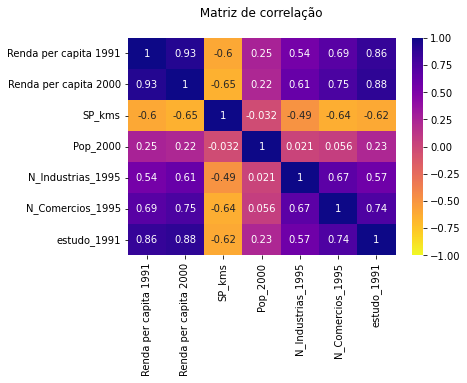

In [3]:
sns.heatmap(base.iloc[:,1:9].corr(),cmap='plasma_r',annot=True,vmin=-1,vmax=1) 
plt.title(" Matriz de correlação \n")
clear_output(wait=True)
plt.show()

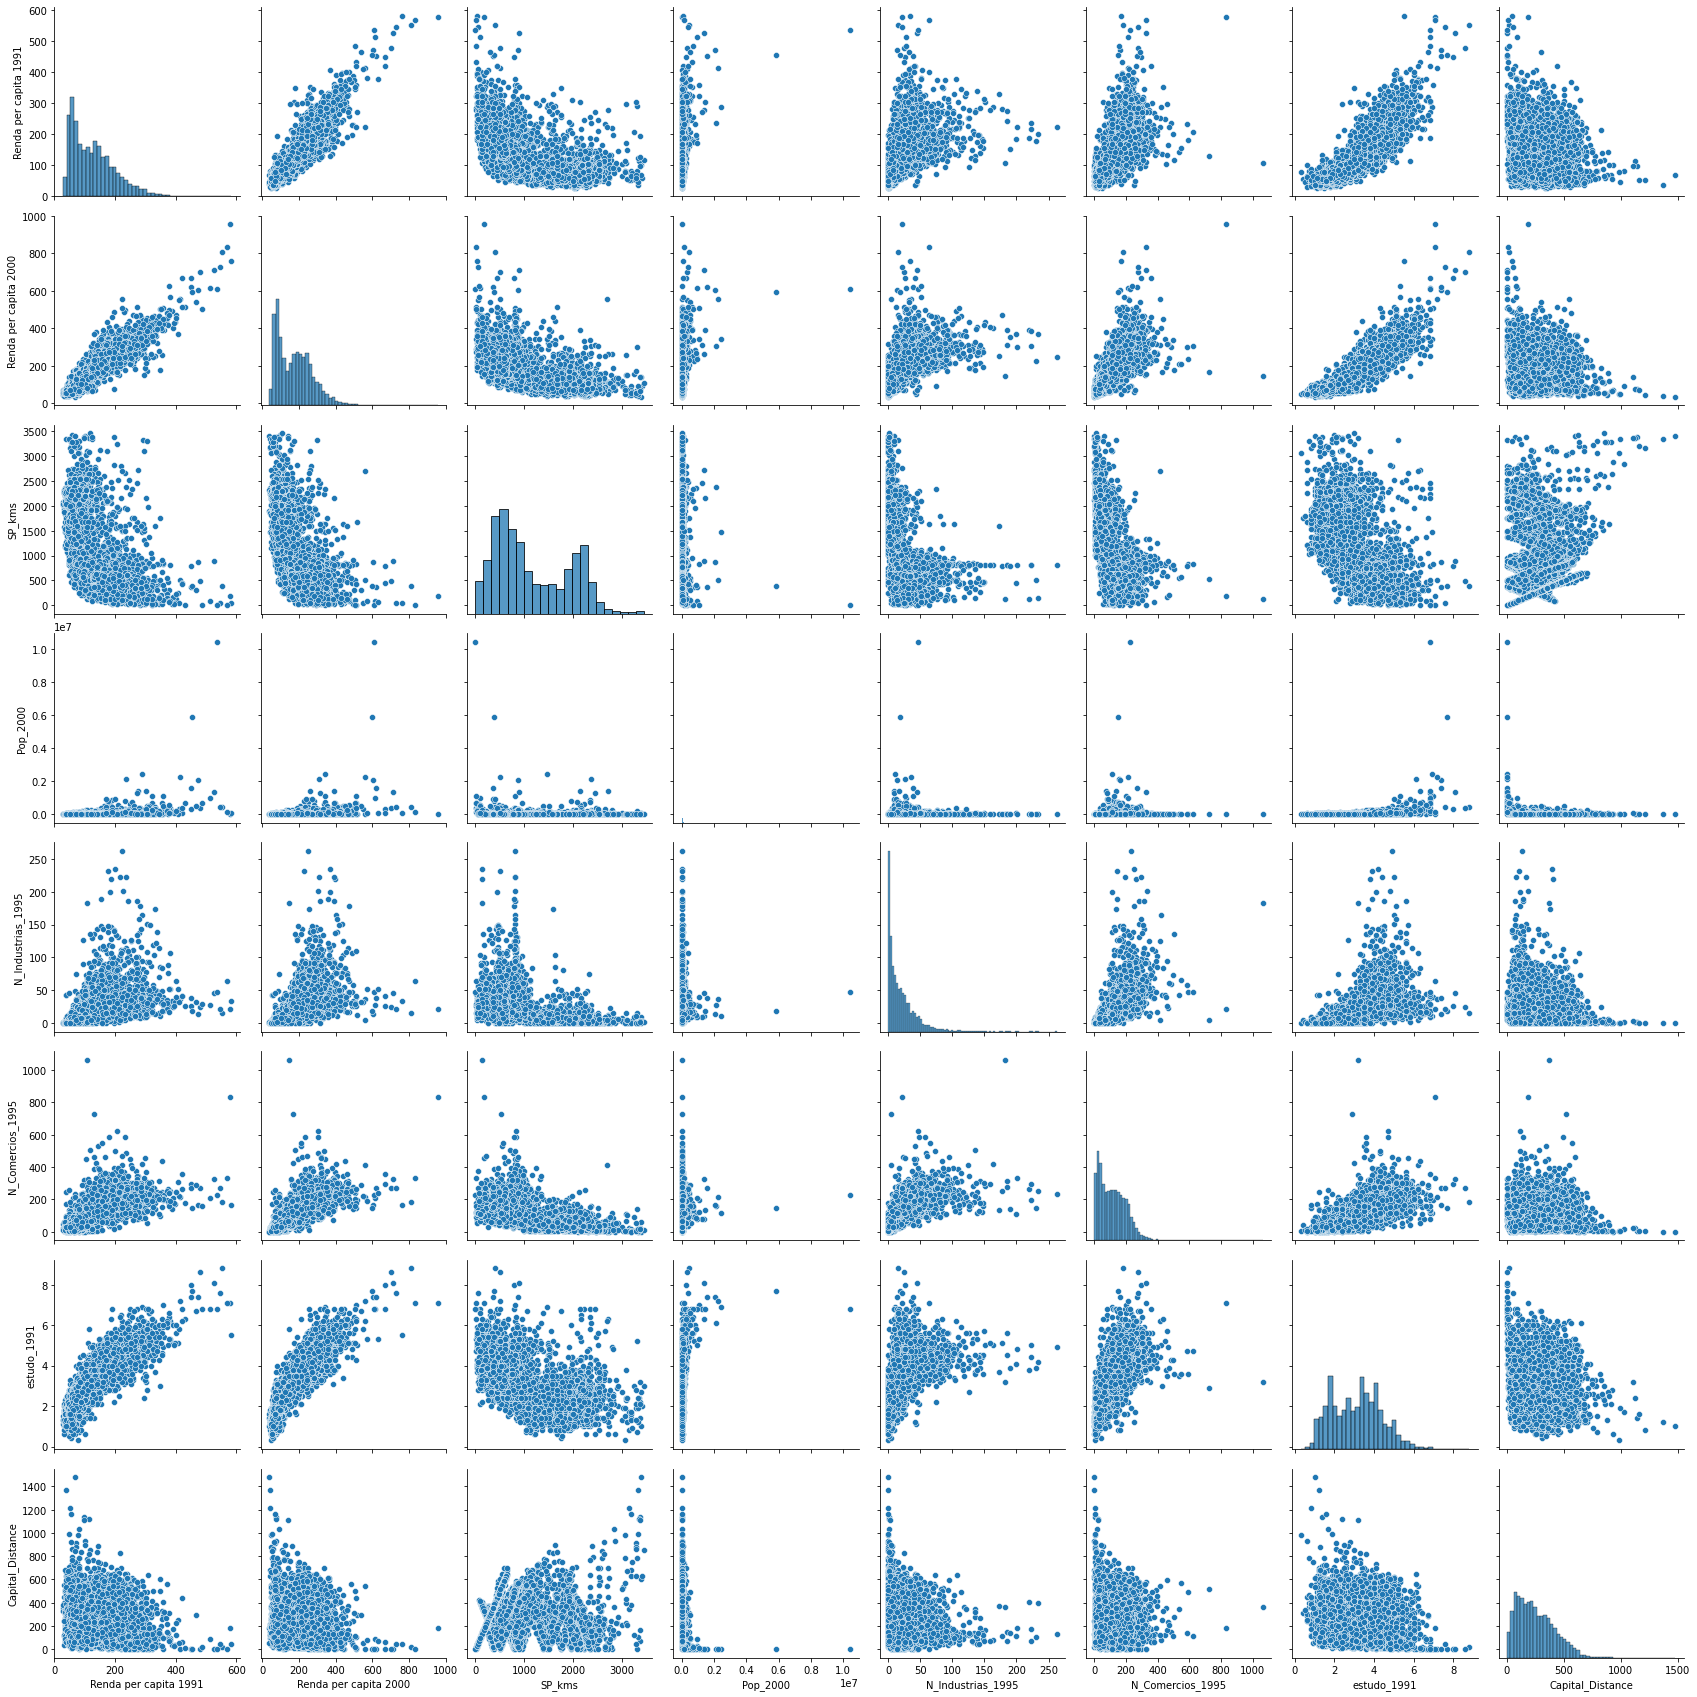

In [4]:
graph = sns.pairplot(base, height=3)

Dessa forma, conforme observado na matriz de correlação de pearson e na matriz de scatterplot, a variável dependente ($y$) é a Renda nos anos 2000, enquanto as variáveis explicativas que esperamos que sejam positivas são Estudo ($x_1$), número de indústrias ($x_2$) e número de comércios ($x_3$). Por outro lado, a única variável explicativa que suponhamos que seja negativa é a distância de São Paulo com o municipio analisada ($x_4$). Ademais, vale incluir na regressão um termo de erro ($u$), que pode conter ou não variáveis omitidas.

Além disso vale lembrar que utilizaremos dados de 1991, 1995 tentando estimar valor da renda per capita em 2000 pelo fato de não haver tantos dados especificos para cada anos, considerando todas essas hipóteses teremo o modelo a seguir:


> $y = β_0 + β_1 x_1 + β_2 x_2 + β_3 x_3 + β_4 x_4 + u$

ou podemos escrever da forma:

> ${Renda Per Capita}_{2000} = β_0 + β_1 (Estudo)_{1991} + β_2 (Industrias /per capita)_{1995} + β_3 (Comercios / per capita)_{1995}+ β_4 (Distância SP)_{kms} + u$


# Desenvolvimento

Bem para iniciar o desenvolvimento da regressão, temos algumas hipóteses a primeira é a de linearidade das váriveis, observando o scatterplot e o objetivo do trabalho iremos considerar está como verdeira, sobre a segunda hipótese de média dos residuos nulas iremos considerar ela como verdadeira, afinal o método de regressão computacional já faz com que a média de residuos seja nula, sobre a hipótese de autocorrelaçao iremos desconsiderar pois o tipo de análise que faremos sobre renda per capita não é um série temporal em sí, e por fim da hipótese de Homocedasticidade infelizmente o python não possui nenhum pacote eficiente para fazer esse teste, então sobra das próximas hipóteses para testar.

### Multicolinearidade

Para tal utilizaremos o teste conhecido como Variance Inflation Factor e utilizaremos como valor limite o 10, observando a tabela a seguir percebemos que embora muito alto nenhum valor ultrapassa 10 e para continuidade do trabalho não iremos eliminar nenhuma dessas variaveis.

In [5]:

# the independent variables set
X = base.iloc[:,[4,6,7,8]]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [VIF(X.values, i)
                          for i in range(len(X.columns))]
  
round(vif_data,1)

,feature,VIF
0,SP_kms,2.1
1,N_Industrias_1995,3.2
2,N_Comercios_1995,8.3
3,estudo_1991,9.7


### Distribuição Normal dos residuos

Aqui, iremos adiantar o modelo de regressão, mas apenas para testar os residuos, utilizaremos o teste de Shapiro Wilk de normalidade.



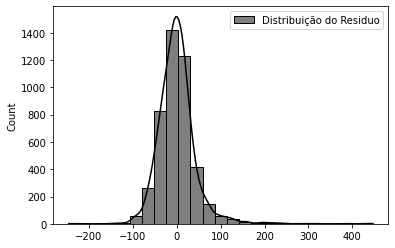

Observamos a seguir que os residuos possuem distribuição normal: 
 >> ShapiroResult(statistic=0.9030674695968628, pvalue=0.0)


In [6]:

colunas = list(base.columns)
colunas[3] = "Valor"
base.columns = colunas


modelo1 = ols('Valor ~ SP_kms + N_Industrias_1995 + N_Comercios_1995 + estudo_1991',data=base).fit()
sns.histplot(modelo1.resid,bins=25,kde=True,color='black',label="Distribuição do Residuo")
clear_output(wait=True)
plt.legend()
plt.show()


print(f"Observamos a seguir que os residuos possuem distribuição normal: \n >> {stats.shapiro(modelo1.resid)}")

### Descritiva 

In [7]:
round(base.describe(),2)

,Renda per capita 1991,Valor,SP_kms,Pop_2000,N_Industrias_1995,N_Comercios_1995,estudo_1991,Capital_Distance
count,4491.00,4491.00,4491.00,4491.00,4491.00,4491.00,4491.00,4490.00
mean,129.00,177.38,1160.04,36083.69,21.14,117.11,3.14,254.74
std,74.90,99.17,755.28,206281.71,24.95,86.26,1.26,168.67
min,27.66,36.96,0.00,795.00,0.00,0.00,0.30,0.00
25%,66.60,89.74,529.63,6410.00,3.94,42.31,2.10,119.21
50%,114.42,167.59,900.35,12665.00,13.68,106.08,3.20,226.55
75%,170.80,240.11,1906.41,25068.50,29.63,175.48,4.00,361.91
max,582.85,954.65,3459.53,10434252.00,262.48,1065.33,8.80,1479.08


Com essa função do pandas, conseguimos uma análise descritiva bem rápida das variaveis, conseguimos ter uma boa ideia de como é a distribuição delas se atrelarmos esses dados com o parplot plotado anteriormente e agora que já fizemos essas considerações iniciais, vamos para a estimação do nosso modelo.

In [8]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     5035.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:20:35   Log-Likelihood:                -23193.
No. Observations:                4491   AIC:                         4.640e+04
Df Residuals:                    4486   BIC:                         4.643e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.0803      3.02

Aparentemente o modelo possui um p valor relativamente alto na estimação do beta 0, veja se fosse utilizado um alfa de 0.05 teriamos problemas com essa váriavel, isso pode significar que talvez falte uma dummy referente a região do país nos nossos dados, vamos adicionar uma dummy e ver o que ocorre.

In [9]:
## Separando estados
dicio = {'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte',  'AM': 'Norte', 'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'CenOes', 'ES': 'Sudeste','GO': 'CenOes', 'MA': 'Nordeste', 'MT': 'CenOes', 'MS': 'CenOes', 'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste','RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste','TO': 'Norte'}

base['Região'] = base['Estado'].map(dicio)

dummies = pd.get_dummies(base['Região'])

for i in dummies.columns:
    base[i]=dummies[i]


## Fazendo regressão com dummies:

modelo2 = ols('Valor ~ SP_kms + N_Industrias_1995 + N_Comercios_1995 + estudo_1991 + CenOes + Nordeste + Norte + Sudeste + Sul -1',data=base).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     2622.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:20:35   Log-Likelihood:                -23116.
No. Observations:                4491   AIC:                         4.625e+04
Df Residuals:                    4482   BIC:                         4.631e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
SP_kms               -0.0257      0.00

Aparentemente conseguimos p valores maiores agora, entretanto o Sul e Sudeste, obviamente possui uma correlação alta com a váriavel SP_kms, ou seja isso explicaria os p valores altos dos betas dessas variaveis, além disso essa expansão do modelo, gerou um ganho marginal de R2 muito baixo. Vamos utilizar um dos testes de hipótese que aprendemos em aula usando a distribuição F para testarmos se esse conjunto de novas variaveis realmente afeta o modelo.

In [10]:
sqr_r = sum([i**2 for i in modelo1.resid])
sqr_ur = sum([i**2 for i in modelo2.resid])
q = 5
k = 4
n=len(base)

f_obs = ( (sqr_r - sqr_ur) / q) / (sqr_ur / n-k-1)

print(f"P- valor: {1-stats.f.cdf(f_obs,q,n-k-q)}")


P- valor: 1.1102230246251565e-16


Como era de se esperar essa nova versão do modelo, não resultou em muitos ganhos, por conta disso iremos voltar para versão mais antiga do modelo, na qual haviam menos variaveis. E vamos nos questionar e se adicionarmos a distância de um município até a sua capital além de sua distancia até a cidade de São Paulo o que mudaria na estimação dos betas?

In [11]:
modelo3 = ols('Valor ~ Capital_Distance + N_Industrias_1995 + N_Comercios_1995 + estudo_1991 + SP_kms',data=base).fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     4036.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:20:35   Log-Likelihood:                -23175.
No. Observations:                4490   AIC:                         4.636e+04
Df Residuals:                    4484   BIC:                         4.640e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6063      3.27

Como podemos observar, alguns betas aumentaram seu p-valor e por incrivel que pareça o ganho marginal de r² após adicionar essa váriavel foi quase nulo.

Agora para finalizar, depois de termos observado como as váriaveis impactam no nível de renda em um municipio, vamos agora para uma análise exploratória em cima do nosso próprio modelo.

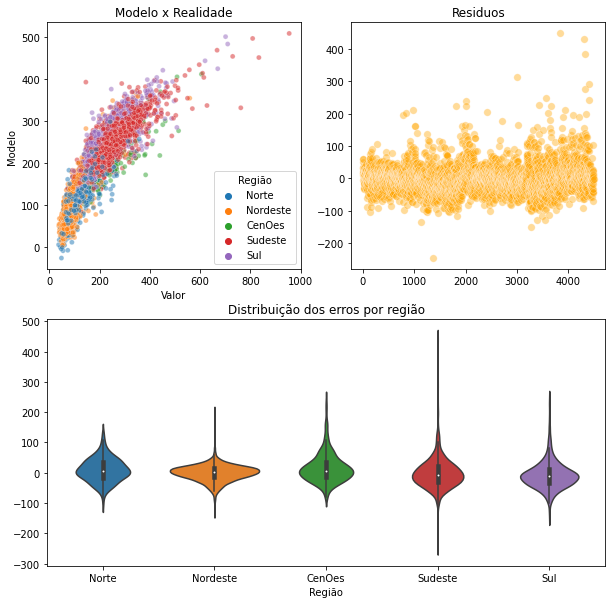

In [12]:
## Fazer o plot do nosso modelo e comparar com a vida real


#Adiconando o primeiro modelo no dataframe
base['Modelo'] = modelo1.fittedvalues

## Fazendo os plots

figura = plt.figure(figsize=(10,10))
gs = figura.add_gridspec(2, 2)

#Plot 1
ax = plt.subplot(gs[0,0]) # row 0, col 0
_=sns.scatterplot(x=base['Valor'],y=base['Modelo'],hue=base['Região'],s=25,markers=False,alpha=.5, ax=ax)
ax.title.set_text('Modelo x Realidade')

#Plot 2
ax = plt.subplot(gs[0,1]) # row 0, col 0
_=sns.scatterplot(x=range(len(base)),y=modelo1.resid,color='orange',s=55,markers=False,alpha=.4, ax=ax)
ax.title.set_text('Residuos')

#Plot 3
ax = plt.subplot(gs[1, :]) # row 0, col 0
_=sns.violinplot(x=base['Região'],y=modelo1.resid,s=25,markers=False,alpha=.5, ax=ax)
ax.title.set_text('Distribuição dos erros por região')

Além do modelo em sí, abaixo temos duas tabelas, de estados que provavelmente seriam bons candidatos a serem os mais adequados ao nosso modelo, utilizando como critério a correlação dos dados com a variavel dependente por cada unidade federativa.

In [13]:

corr=base[['Estado','Valor','N_Industrias_1995']].groupby('Estado').corr()['N_Industrias_1995'].reset_index()
corr = corr[corr['level_1'] == 'Valor'].set_index('Estado').drop(columns='level_1')

corr2=base[['Estado','Valor','SP_kms']].groupby('Estado').corr()['SP_kms'].reset_index()
corr2 = corr2[corr2['level_1'] == 'Valor'].set_index('Estado').drop(columns='level_1')
corr=pd.merge(corr,corr2,left_index=True,right_index=True)

corr2=base[['Estado','Valor','estudo_1991']].groupby('Estado').corr()['estudo_1991'].reset_index()
corr2 = corr2[corr2['level_1'] == 'Valor'].set_index('Estado').drop(columns='level_1')
corr=pd.merge(corr,corr2,left_index=True,right_index=True)


#Manipule você mesmo a tabela para observar melhor
print("Número de industrias:")
display(corr.sort_values('N_Industrias_1995',ascending=False)[:3])
print("\n","-"*50,"\n")


print("Distância até SP:")
display(corr.sort_values('SP_kms')[:3])
print("\n","-"*50,"\n")


print("Anos médios de Estudo:")
display(corr.sort_values('estudo_1991',ascending=False)[:3])
print("\n","-"*50,"\n")

Número de industrias:


,N_Industrias_1995,SP_kms,estudo_1991
Estado,,,
RR,0.785175,-0.204098,0.931371
BA,0.665390,-0.092546,0.810116
TO,0.656601,-0.266307,0.840010



 -------------------------------------------------- 

Distância até SP:


,N_Industrias_1995,SP_kms,estudo_1991
Estado,,,
MG,0.435264,-0.549567,0.824279
GO,0.285055,-0.516304,0.687880
PA,0.576226,-0.440125,0.570097



 -------------------------------------------------- 

Anos médios de Estudo:


,N_Industrias_1995,SP_kms,estudo_1991
Estado,,,
AC,0.648129,-0.391011,0.933499
RR,0.785175,-0.204098,0.931371
PB,0.506240,0.162713,0.869559



 -------------------------------------------------- 



# Conclusão

Com a realização do trabalho, foi concluído que é possível testar de forma técnica hipóteses utilizadas em modelos econômicos e seus resultados, como também conseguimos observar de maneira mais clara a forma com a qual as variáveis observadas podem explicar a riqueza de uma economia, da mesma forma que aprendemos isso em diversos outros modelos ao longo do curso. O grupo particularmente considera importante e proveitoso essa oportunidade de colocar em prática o estudo da economia de um campo menos teórico e mais aplicado. 


# Referências

Artigos

*   https://www.revistaaber.org.br/rberu/article/view/165/174
*   http://www.repositorio.jesuita.org.br/bitstream/handle/UNISINOS/3055/estimativas_volume.pdf?sequence=1&isAllowed=y
*   https://www.scielo.br/j/ecoa/a/zqDqP4CzjkgcnzcS4hCms6D/?format=pdf&lang=pt




*   [IPEA](http://www.ipeadata.gov.br/Default.aspx)



*   [IBGE](https://groups.google.com/g/qgisbrasil/c/0kJDo2KH0is?pli=1 )

